---
# Example of 1-D bayesian classification. 
---

Let us assume that we have some random data spread in a bimodal histogram and that we would like to separate the data in two classes. 
How should we proceed?

For simplicity, we also assume the overall probability density function (PDF) to be a mixture of two 
gaussian PDFs. Thus we have:

<blockquote>  $P(x|C_{0}) = \frac{1}{\sqrt{2\pi \sigma_{0}}} e^{-(x-\mu_{0})^2/2\sigma_{0}^2}$  with a class probability of $P(C_{0})$</blockquote>  
<blockquote>  $P(x|C_{1}) = \frac{1}{\sqrt{2\pi \sigma_{1}}} e^{-(x-\mu_{1})^2/2\sigma_{1}^2}$  with a class probability of $P(C_{1})$</blockquote>  

where $P(x|C_{i})$ is the probability of observing x in class i. The overall PDF is given by: 

<blockquote>  $P(x) = P(C_{0}) P(x|C_{0}) + P(C_{1}) P(x|C_{1})$</blockquote>


We can use Bayes' method to obtain the <i>a posteriori</i> class probabilities $P(C_{i}|x)$ which is the probability of class i given the observation x. <br>

Why should we bother? Actually, we are often more interested in predicting the most probable class associated to a given observation x than
knowing the probability of observing x in a given class.

Using this information, we will be able to locate the boundaries delimiting the influence zone of each class, i.e. where $P(C_{1}|x) > P(C_{0}|x)$ or $P(C_{0}|x) > P(C_{1}|x)$


In [1]:
print(__doc__)

# Authors: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: XXX

import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math
import seaborn as sns

Automatically created module for IPython interactive environment


Let us define a function to generate the individual PDFs, i.e. the probability of each 
observation x for each class: $P(x|C_{i})$.

In [2]:
def generate_PDF():
    x = np.linspace(-10., 10., 100)

    pdf_a = scipy.stats.norm.pdf(x,mu[0],sigma[0])
    pdf_b = scipy.stats.norm.pdf(x,mu[1],sigma[1])

    return (x, pdf_a, pdf_b)

Using the probability of observation x for each class $P(x|C_{i})$ and the <i>a priori</i> class 
probabilities $P(C_{i})$, we can compute the <i>a posteriori</i> probabilities $P(C_{i}|x)$. Those are 
the probabilities of each class given the observations x. <br> 

According to Bayes' theorem, the <i>a posteriori</i> probabilities are: <br>
<blockquote> $P(C_{i}|x) = P(x|C_{i}) P(C_{i}) / P(x)$ </blockquote> <br>

with the normalization factor $P(x)$: <br>
<blockquote> $P(x) = \sum_{i=1}^{2}{P(x|C_{i}) P(C_{i})}$ </blockquote> 

In [3]:
def compute_a_posteriori_probabilities():

    # We use the discriminant function notation h(x).The denominator is the normalization factor
    h_a = pdf_a*pC[0]/(pdf_a*pC[0] + pdf_b*pC[1])
    
    h_b = 1- h_a

    return (h_a, h_b)

We use this printing function to make the code more readable.

In [4]:
def print_distributions():

    # Display P(X|C) and P(C|X) for each class

    label1 = "$\mu$ = %.0f  $\sigma$ = %.1f  $P(C)$ = %.1f" % (mu[0], sigma[0], pC[0])
    label2 = "$\mu$ = %.0f  $\sigma$ = %.1f  $P(C)$ = %.1f" % (mu[1], sigma[1], pC[1])

    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    axs[0].plot(x,pdf_a, color='red', label=label1)
    axs[0].plot(x,pdf_b, color='blue', label=label2,linestyle='--')
    axs[0].grid()
    axs[0].legend()
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('$P(x|C)$')
    axs[0].set_title('Class PDFs',fontsize=10)

    axs[1].plot(x,h_a, color='red')
    axs[1].plot(x,h_b, color='blue',linestyle='--')
    axs[1].grid()
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('$P(C|x)$')
    axs[1].set_title('$\it{A Posteriori}$ Class Probabilities',fontsize=10)

    plt.savefig(figName, format='png')

    plt.show()

## Example I: PDFs with identical standard deviations and <i>a priori</i> class probabilities  

This is a simple example where the individual PDFs are similar except for their mean values. Looking at the first panel 
below, a threshold value of $x=0$ can delineate the influence zone of each class :  
<blockquote> Class 1 wins when $P(C_{1}|x) > P(C_{0}|x)$ i.e. when $x \geq 0$ </blockquote> 

There is no need to look at the second panel; the curves' symmetry in the first panel is enough. No need 
for Bayes' theorem here.

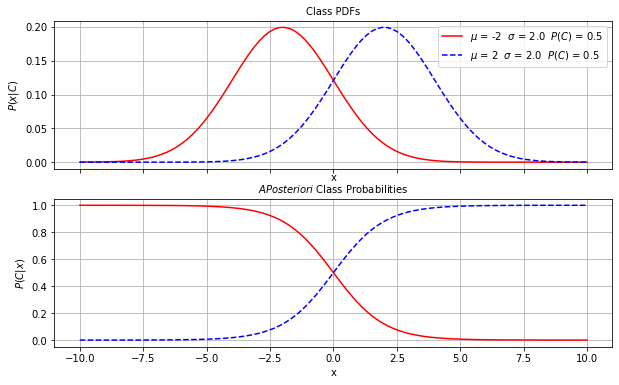

In [5]:
mu    = [-2.0, 2.0] 
sigma = [2.0, 2.0]
pC    = [0.5, 0.5]


(x, pdf_a, pdf_b) = generate_PDF()

(h_a, h_b) = compute_a_posteriori_probabilities()


figName = "Easy 1-D Bayesian classification.png"
print_distributions()

## Example II: PDFs with different standard deviations and <i>a priori</i> class probabilities  

This a more difficult problem. In the first panel below, both curves cross each other twice along the x axis. Hence, there are 2 thresholds delimiting 
the local winning class but it is not obvious what their values are. 

It is a situation where Bayes' theorem becomes handy. The second panel shows very well where to put the thresholds:

<blockquote> $x\approx -9$ and $x\approx 2$. Class 0 wins when the <i>a posteriori</i> 
probabilities $P(C_{0}|x) > P(C_{1}|x)$ i.e. when $x \in \left[ -9, 2 \right]$  </blockquote>


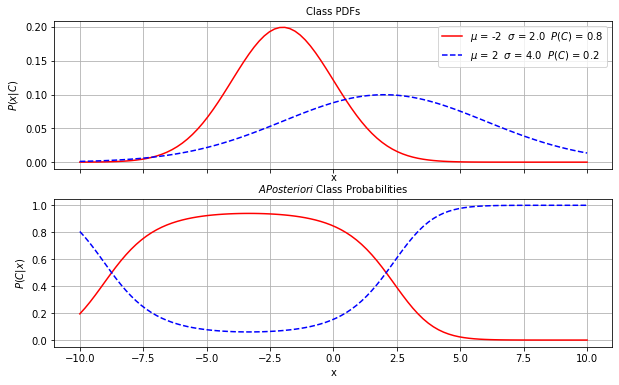

In [6]:
mu    = [-2.0, 2.0] 
sigma = [2.0, 4.0]
pC    = [0.8, 0.2]

(x, pdf_a, pdf_b) = generate_PDF()

(h_a, h_b) = compute_a_posteriori_probabilities()


figName = "Hard 1-D Bayesian classification.png"
print_distributions()